In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [20]:
# Load the dataset
df = pd.read_csv("./Month_Value_1.csv")

# Display the first few rows
print("Dataset Preview:")
df.head()

Dataset Preview:


,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [21]:
# Convert 'Period' to datetime and set as index
df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')
df = df.set_index('Period')

# Drop NaN values for analysis
df_clean = df.dropna()

# Display dataset info
print("\nClean Dataset Info:")
print(df_clean.info())

# Basic statistics
print("\nDescriptive Statistics:")
df_clean.describe()


Clean Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2015-01-01 to 2020-04-01
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Revenue                                   64 non-null     float64
 1   Sales_quantity                            64 non-null     float64
 2   Average_cost                              64 non-null     float64
 3   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4)
memory usage: 2.5 KB
None

Descriptive Statistics:


,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,6.400000e+01,64.000000,64.000000,6.400000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,1.164150e+07,6591.287257,296.844793,1.057191e+06
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.242655e+07,15065.500000,1499.142841,2.782857e+07
50%,3.209088e+07,18368.000000,1654.399798,2.819785e+07
75%,3.992999e+07,22856.250000,1916.401096,2.987852e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


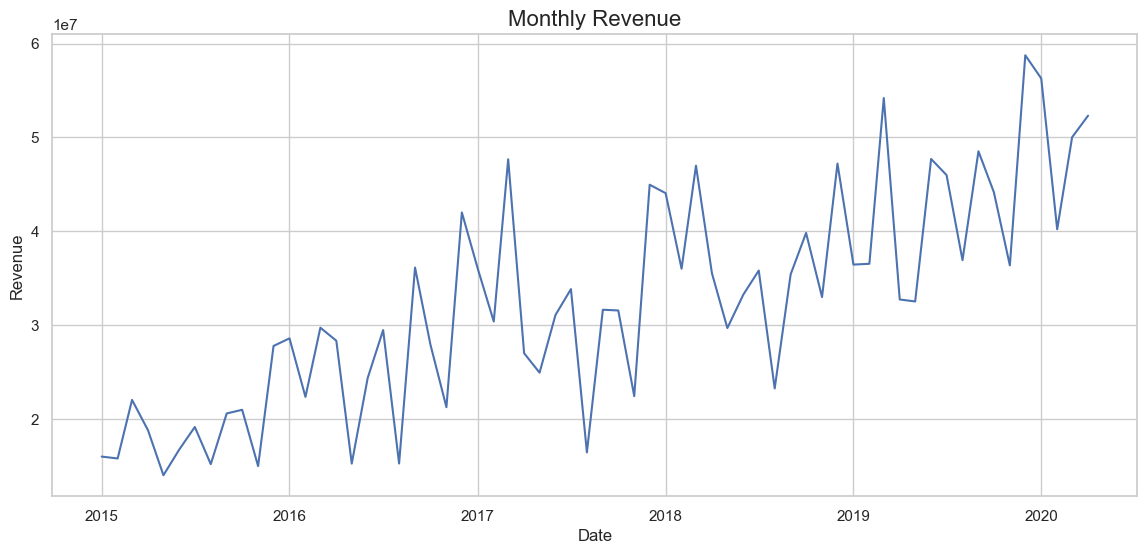

In [4]:
# Visualize the Revenue time series
plt.figure(figsize=(14, 6))
plt.plot(df_clean['Revenue'])
plt.title('Monthly Revenue', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.grid(True)
plt.show()

In [23]:
result = adfuller(df_clean['Sales_quantity'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: 1.157056206094537
p-value: 0.9956753282590142


In [24]:
df_diff = df_clean['Sales_quantity'].diff().dropna()
result = adfuller(df_diff)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -9.02300082504805
p-value: 5.7081705061833116e-15


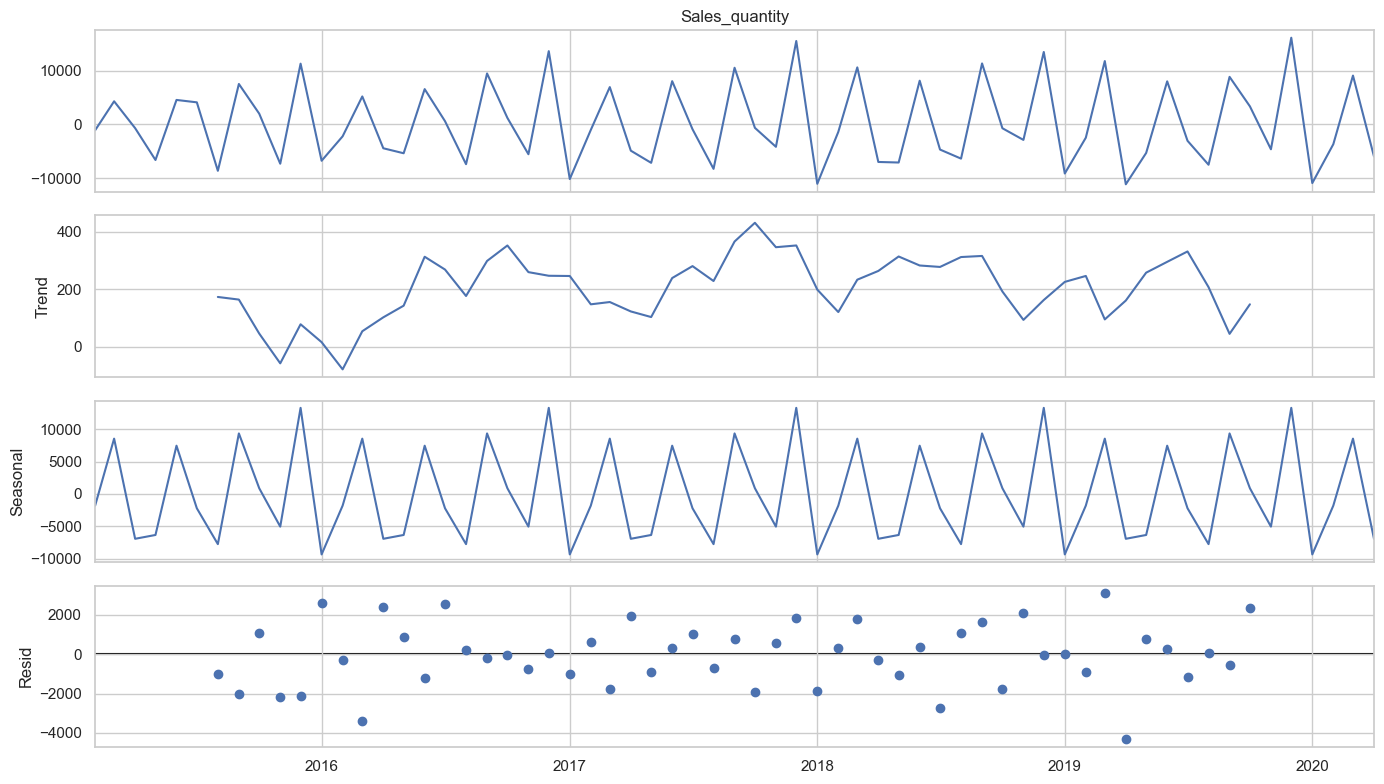

In [26]:
decomposed = seasonal_decompose(df_diff, model='additive')
decomposed.plot()
plt.show()

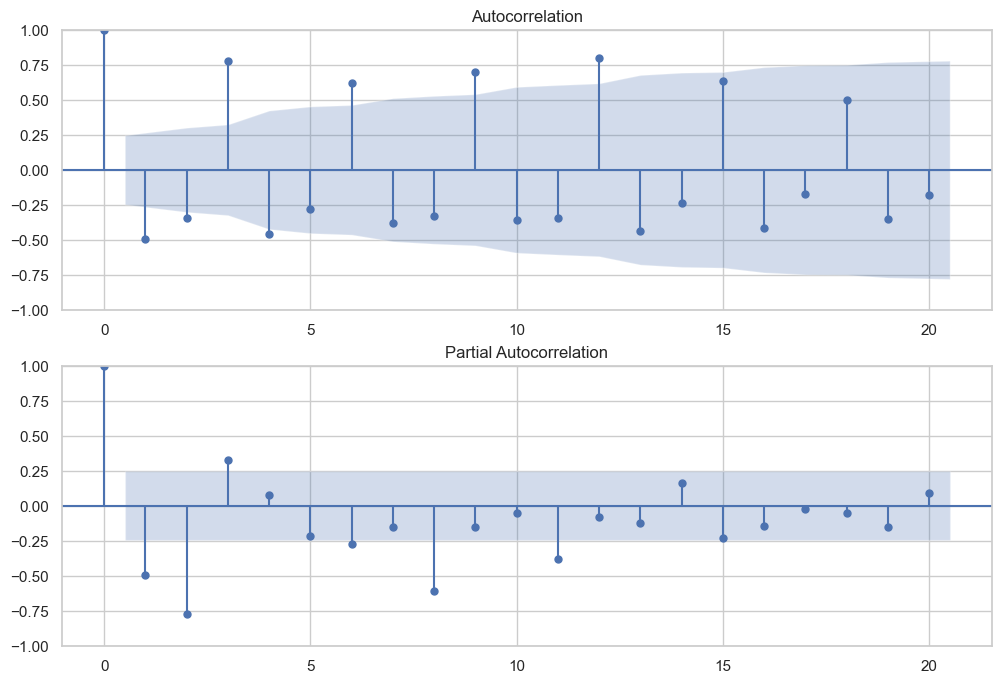

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df_diff, lags=20, ax=ax[0])
plot_pacf(df_diff, lags=20, ax=ax[1])
plt.show()

In [43]:
model = ARIMA(df_clean['Sales_quantity'], order=(4, 1, 4))
model_fit = model.fit()

In [44]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Sales_quantity   No. Observations:                   64
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -601.018
Date:                Sun, 20 Apr 2025   AIC                           1220.036
Time:                        11:08:50   BIC                           1239.324
Sample:                    01-01-2015   HQIC                          1227.622
                         - 04-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6201      0.127      4.893      0.000       0.372       0.869
ar.L2         -0.1862      0.075     -2.478      0.013      -0.333      -0.039
ar.L3          0.7772      0.063     12.350      0.000       0.654       0.901
ar.L4         -0.7740      0.121     -6.411      0.000      -1.011      -0.537
ma.L1         -1.1999      0.526     -2.282      0.023      -2.231      -0.169
ma.L2          0.5990      0.164      3.662      0.000       0.278       0.920
ma.L3         -1.1606      0.691     -1.680      0.093      -2.514       0.193
ma.L4          0.9727      0.315      3.092      0.002       0.356       1.589
sigma2       1.05e+07   5.35e-08   1.96e+14      0.000    1.05e+07    1.05e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.90   Jarque-Bera (JB):                 1.83
Prob(Q):                              0.17   Prob(JB):                         0.40
Heteroskedasticity (H):               0.71   Skew:                             0.04
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.58e+31. Standard errors may be unstable.
"""

In [46]:
# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

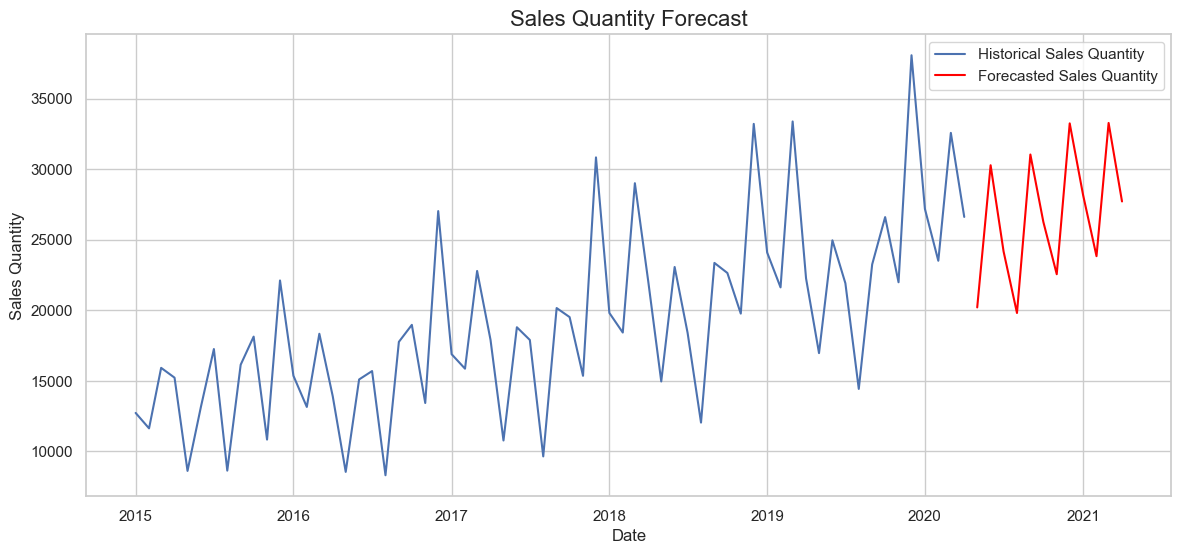

In [47]:
# Plot the predictions
plt.figure(figsize=(14, 6))
plt.plot(df_clean['Sales_quantity'], label='Historical Sales Quantity')
plt.plot(forecast, label='Forecasted Sales Quantity', color='red')
plt.title('Sales Quantity Forecast', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales Quantity', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()